In [1]:
# !pip show scikit-learn
# !pip freeze
# import sklearn
# !sklearn.show_versions()
# !pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import glob
import os
from PIL import Image
import re
import matplotlib.pyplot as plt
import matplotlib.image as imread

In [3]:
img_train = glob.glob("/kaggle/input/rice-train/Data Train/*.jpg")
img_ls_train = []
for l in img_train:
    k = Image.open(l)
    a = np.array(k)
    img_ls_train.append(a)

In [4]:
img_test = glob.glob("/kaggle/input/Ricetest/Data Test/*.jpg")
img_ls_test = []
for l in img_test:
    k = Image.open(l)
    a = np.array(k)
    img_ls_test.append(a)

In [5]:
print(img_ls_test[0].shape)
print(img_ls_train[0].shape)

(250, 250, 3)
(250, 250, 3)


In [6]:
print(img_ls_test[0].ndim)
print(img_ls_test[0].size)
print(img_ls_test[0].shape)

3
187500
(250, 250, 3)


In [7]:
tras_img_train = []
for i in range(len(img_ls_train)):
    tt = img_ls_train[i].reshape(-1)
    tras_img_train.append(tt)

tras_img_train = np.array(tras_img_train)
print(np.array(tras_img_train))
print("="*50)

tras_img_test = []
for i in range(len(img_ls_test)):
    tt = img_ls_test[i].reshape(-1)
    tras_img_test.append(tt)

tras_img_test = np.array(tras_img_test)
print(np.array(tras_img_test))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(tras_img_train[0].ndim)
print(tras_img_train[0].size)
print(tras_img_train[0].shape)

1
187500
(187500,)


In [9]:
df_train = pd.DataFrame(tras_img_train)
df_test = pd.DataFrame(tras_img_test)

In [10]:
f_name_train = []
for t in img_train:
    k = Image.open(t)
    f_name_train.append(os.path.split(t)[-1][:7])

f_name_test = []
for t in img_test:
    k = Image.open(t)
    f_name_test.append(os.path.split(t)[-1][:7])

In [11]:
df_train['Target'] = f_name_train
df_test['Target'] = f_name_test

In [12]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine


In [13]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,187491,187492,187493,187494,187495,187496,187497,187498,187499,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jasmine
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Karacad
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ipsala
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arborio
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ipsala
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arborio
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,basmati


In [14]:
df_val_train = df_train.iloc[:,:-1]
np_ar_train = np.array(df_val_train)
np_ar_rs_train = np_ar_train.reshape(450,250,250,3)

df_val_test = df_test.iloc[:,:-1]
np_ar_test = np.array(df_val_test)
np_ar_rs_test = np_ar_test.reshape(50,250,250,3)

Target    Ipsala 
Name: 402, dtype: object


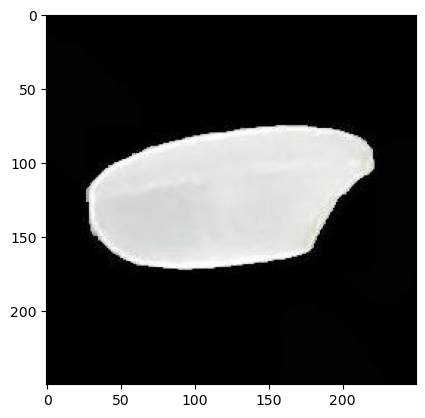

In [15]:
plt.imshow(np_ar_rs_train[402])
print(df_train.iloc[402][-1:])

Target    Arborio
Name: 42, dtype: object


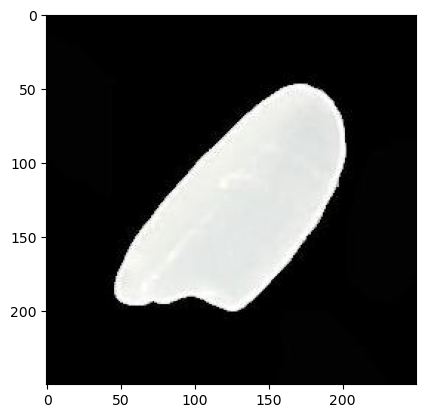

In [16]:
plt.imshow(np_ar_rs_test[42])
print(df_train.iloc[42][-1:])

In [17]:
df_train.shape

(450, 187501)

In [18]:
df_test.shape

(50, 187501)

In [19]:
# from sklearn.utils import shuffle
# df = shuffle(df).reset_index()

In [20]:
# df.drop(columns=['index'],inplace=True,axis=1)
# df

In [21]:
x_train = df_train.iloc[:,:-1]
x_test = df_test.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
y_test = df_test.iloc[:,-1]

In [22]:
def data_summary(X_train=x_train, y_train=y_train, X_test=x_test, y_test=y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    # print('Train labels:', y_train) ## For Numpy
    print('Train labels:', np.array(y_train)) ## For Pandas to Numpy
    # print('Test labels:', y_test)
    print('Test labels:', np.array(y_test))

In [23]:
250 * 250

62500

In [42]:
testing_sam = y_test

In [25]:
data_summary()

Train images shape: (450, 187500)
Train labels shape: (450,)
Test images shape: (50, 187500)
Test labels shape: (50,)
Train labels: ['Karacad' 'basmati' 'Karacad' 'Karacad' 'basmati' 'Karacad' 'Ipsala '
 'Jasmine' 'basmati' 'Karacad' 'Arborio' 'Karacad' 'Ipsala ' 'basmati'
 'Jasmine' 'Arborio' 'Ipsala ' 'Arborio' 'basmati' 'basmati' 'basmati'
 'Arborio' 'Karacad' 'Arborio' 'Arborio' 'Jasmine' 'Jasmine' 'basmati'
 'basmati' 'Karacad' 'Arborio' 'Arborio' 'Jasmine' 'Arborio' 'Jasmine'
 'Jasmine' 'Ipsala ' 'Karacad' 'Karacad' 'Jasmine' 'Arborio' 'Ipsala '
 'Arborio' 'Karacad' 'Jasmine' 'Jasmine' 'Ipsala ' 'basmati' 'Ipsala '
 'Karacad' 'Ipsala ' 'Karacad' 'Karacad' 'Ipsala ' 'Ipsala ' 'Ipsala '
 'Jasmine' 'Karacad' 'Karacad' 'Karacad' 'Ipsala ' 'Arborio' 'Ipsala '
 'Jasmine' 'Ipsala ' 'Ipsala ' 'Karacad' 'Jasmine' 'Arborio' 'Arborio'
 'Ipsala ' 'Jasmine' 'Karacad' 'Arborio' 'Ipsala ' 'Arborio' 'Jasmine'
 'basmati' 'Karacad' 'Ipsala ' 'basmati' 'Karacad' 'basmati' 'Jasmine'
 'Karacad' 'Kara

In [26]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255


In [27]:
# from sklearn.preprocessing import OneHotEncoder

y_train = pd.get_dummies(y_train, columns = ['Target'])
y_train = np.array(y_train)
print(y_train)

y_test = pd.get_dummies(y_test, columns = ['Target'])
y_test = np.array(y_test)
print(y_test)

# # # from tensorflow.keras.utils import to_categorical
# # # y_train = to_categorical(y_train, NUM_CLASSES)
# # # y_test = to_categorical(y_test, NUM_CLASSES)

[[0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]
[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]]


Target    Arborio
Name: 10, dtype: object


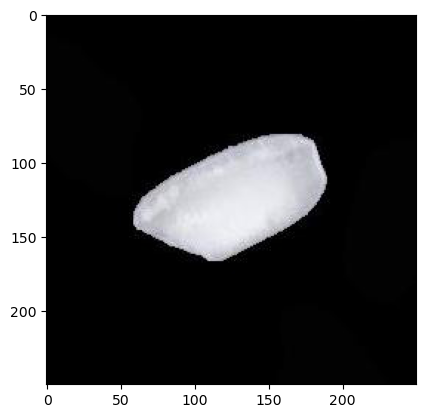

In [28]:
plt.imshow(np_ar_rs_test[10])
print(df_test.iloc[10][-1:])

In [29]:
print([x_train.shape,y_train.shape,x_test.shape,y_test.shape])

[(450, 187500), (450, 5), (50, 187500), (50, 5)]


In [30]:
NUM_ROWS = 250 
NUM_COLS = 250
DIM_3 = 3

NUM_ROWS * NUM_COLS * DIM_3

187500

In [31]:
from keras import models
from keras.layers import Dense, Dropout

model = models.Sequential()
model.add(Dense(2048, activation='relu', input_shape=(NUM_ROWS * NUM_COLS * DIM_3,)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              384002048 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               1049088   
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 385,183,749
Trainable params: 385,183,749


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

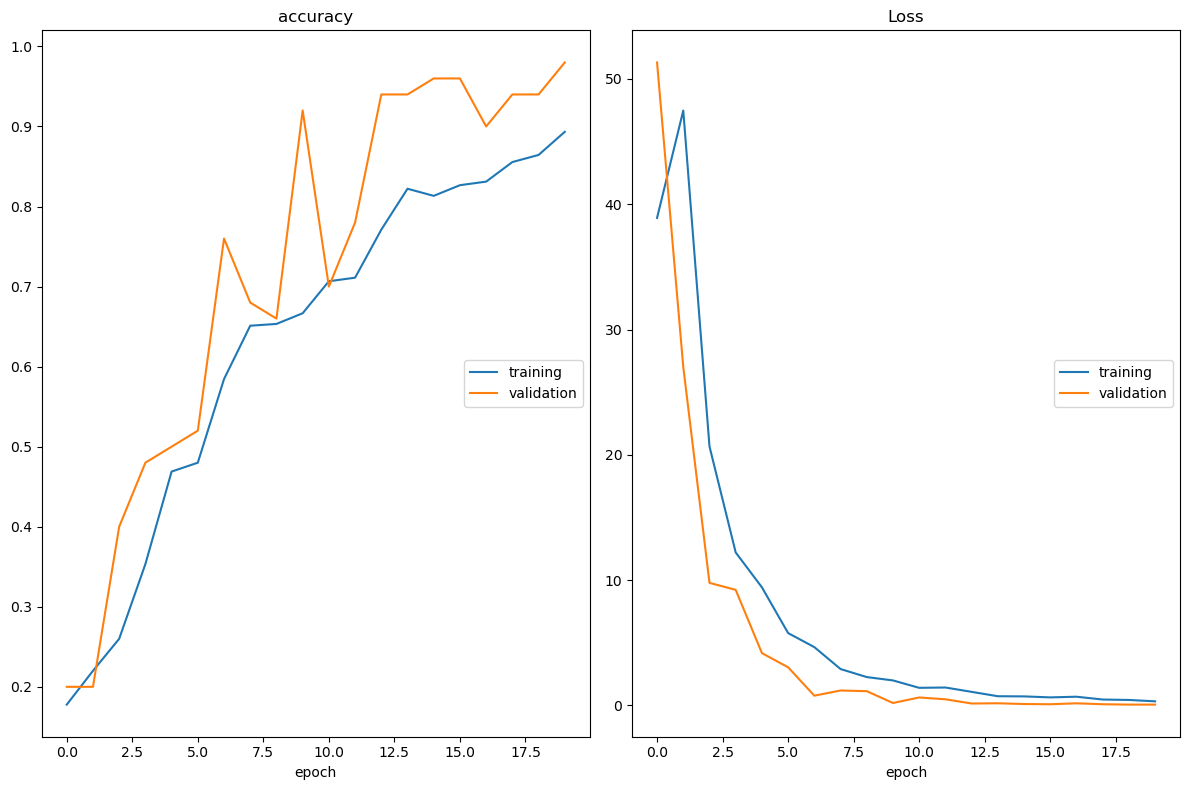

accuracy
	training         	 (min:    0.178, max:    0.893, cur:    0.893)
	validation       	 (min:    0.200, max:    0.980, cur:    0.980)
Loss
	training         	 (min:    0.332, max:   47.476, cur:    0.332)
	validation       	 (min:    0.070, max:   51.317, cur:    0.070)
3/3 [==============================] - 15s 5s/step - loss: 0.3323 - accuracy: 0.8933 - val_loss: 0.0702 - val_accuracy: 0.9800


In [35]:
!pip install livelossplot
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
# Train model
model.fit(x_train, y_train,
          batch_size=200,
          epochs=20,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(x_test, y_test))

In [36]:
score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 - 1s - loss: 0.0702 - accuracy: 0.9800 - 718ms/epoch - 359ms/step
Test loss: 0.07023975253105164
Test accuracy: 0.9800000190734863


In [37]:
predictions = model.predict(x_test)

2/2 [==============================] - 1s 234ms/step


In [38]:
test_sample = 20

[0 1 0 0 0]
Target    Ipsala 
Name: 20, dtype: object


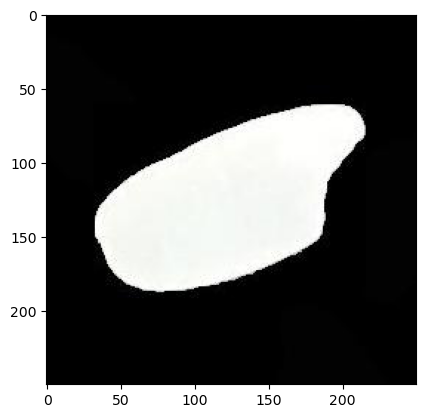

In [46]:
print(y_test[test_sample])

plt.imshow(np_ar_rs_test[test_sample])
print(df_test.iloc[test_sample][-1:])

In [40]:
predictions[test_sample]

array([2.0828757e-37, 9.9999994e-01, 0.0000000e+00, 0.0000000e+00,
       3.7119456e-33], dtype=float32)